<a href="https://colab.research.google.com/github/SilviaQ98/Web_Scraping/blob/main/Ej1/Recaudacion_peliculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pre Requisitos

In [ ]:
# Instalación de las librerias o dependencias necesarias
!pip install beautifulsoup4 requests pandas

In [ ]:
# Load dependencies
import json # modulo para trabajar con archivos JSON
import requests # libreria para hacer peticiones HTTP
import pandas as pd # libreria para procesar datos, proporciona funciones para analíticas
from bs4 import BeautifulSoup as bs # Extraer información de paginas web


# 2. Funciones para procesamiento de los datos

In [ ]:
# Función que convierte una lista de elementos en un dataframe de pandas
def rowsToDataFrame(rows):
    df = pd.DataFrame(rows[1:], columns=rows[0])
    return df

In [ ]:
# Función para extraer los datos de una tabla HTML
def processTableData(tbl):
    rows = []
    for child in tbl.find('tbody').children: # itera los items internos de la tabla [<tr>]
        row = []
        for td in child: # itera los items internos de la tabla [<td>]
            try:
                item = td.text.replace('\n', '') # recupera el texto del elemento [<td>]
                if item:
                    row.append(item) # Agrega cada elemento de la fila
            except:
                continue
        if len(row) > 0:
            rows.append(row) # agrega todos los campos de una fila de la tabla
    # print(rows)
    return rows

In [ ]:
# Función para extraer la data de la URL y procesar el contenido HTML
def processDataHTML(data):
    soup = bs(data['sections'][1]['text'], 'html.parser') # Recupera el item del JSON y lo convierte en contenido HTML
    tbl = soup.find_all('table')[0] # Recupera la tabla del contenido HTML
    tblRows = processTableData(tbl) # Ejecuta la función apra procesar el contenido de la Tabla
    return tblRows

# 3. Extracción de Información

In [ ]:
# Read website
r = requests.get('https://www.wikiwand.com/mcs-api/es.wikipedia.org/v1/page/mobile-sections-remaining/Anexo%3APel%C3%ADculas_con_las_mayores_recaudaciones')  # Recuperamos el contenido de la web
# print(r)
table = processDataHTML(json.loads(r.content)) # Formate el contenido en formato JSON
df = rowsToDataFrame(table) # ejecuta la funcion para recupera los datos de la tabla como dataframe de Pandas
df

,N.º,Título,Distribuidora(s),Recaudación mundial en USD,Año,Director(es)
0,1,Lo que el Viento se Llevó,MGM,4 192 000 000,1939,Victor Fleming
1,2,Avatar,20th Century Fox,3 824 000 000,2009,James Cameron
2,3,Titanic,20th Century Fox,3 485 000 000,1997,James Cameron
3,4,Star Wars: Episodio IV - Una Nueva Esperanza,20th Century Fox,3 443 000 000,1977,George Lucas
4,5,Avengers: Endgame,Disney,3 165 000 000,2019,Anthony y Joe Russo
5,6,The Sound of Music,20th Century Fox,2 884 000 000,1965,Robert Wise
6,7,"E.T., el Extra-terrestre",Universal Pictures,2 815 000 000,1982,Steven Spielberg
7,8,Los Diez Mandamientos,Paramount Pictures,2 665 000 000,1956,Cecil B. DeMille
8,9,Doctor Zhivago,MGM,2 526 000 000,1965,David Lean
9,10,Star Wars: Episodio VII - El Despertar de la F...,Disney,2 491 000 000,2015,J. J. Abrams


In [ ]:
# Inspeccionamos el tipo de dato de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   N.º                         10 non-null     object
 1   Título                      10 non-null     object
 2   Distribuidora(s)            10 non-null     object
 3   Recaudación mundial en USD  10 non-null     object
 4   Año                         10 non-null     object
 5   Director(es)                10 non-null     object
dtypes: object(6)
memory usage: 608.0+ bytes


# 4. Almacenamiento de los datos

In [ ]:
# Guardamos las datos extraidos como archivo CSV
# se puede aplicar otras opciones para guardar (Base de datos)
df.to_csv('peliculas_recaudacion.csv')

In [ ]:
df.describe()

,N.º,Título,Distribuidora(s),Recaudación mundial en USD,Año,Director(es)
count,10,10,10,10,10,10
unique,10,10,5,10,9,9
top,1,Lo que el Viento se Llevó,20th Century Fox,4 192 000 000,1965,James Cameron
freq,1,1,4,1,2,2


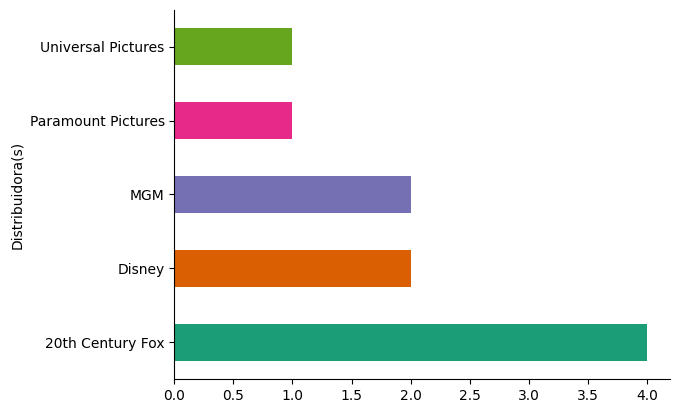

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Distribuidora(s)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# 5. Referencias

### DEPENDENCIES
* [beautifulsoup4](https://pypi.org/project/BeautifulSoup/)
* [requests](https://pypi.org/project/requests/)
* [pandas](https://pypi.org/project/pandas/)

### Urls de interes
* [Estadisticas Mundial 1](https://www.wikiwand.com/es/Anexo:Tabla_estadística_de_la_Copa_Mundial_de_Fútbol)
* [Estadisticas Mundial 2](https://www.sobrefutbol.com/mundiales/mundial_estadisticas.htm)
* [Estadisticas Mundial 3](https://www.livefutbol.com/clasificacion_historica/wm/)
* [Estadisticas Mundial 4](https://www.soccerstats.com/leagueview.asp?league=worldcup)
* [Estadisticas Mundial 5](https://www.fixturesfootball.com/fifa-world-cup-all-time-stats/)